In [1]:
from sympy import *
from sympy.plotting import *
init_printing()
#Vamos a definir la funcion modulo:
def modulo(vec):
    aux = 0
    for i in vec:
        aux+=S(i)**2
    return sqrt(aux)
#Vamos a definir la funcion para derivar:
def derivar(vec,var):
    aux = []
    for i in vec:
        aux.append(diff(S(i),var))
    return aux
#Vamos a definir la funcion para integrar:
def integrar(vec, var):
    aux = []
    for i in vec:
        aux.append(integrate(S(i),var))
    return aux
#Vamos a definir la funcion para sumar vectores:
def sumarvectores(vec1,vec2):
    return [sum(x) for x in zip(*[vec1,vec2])]
#Vamos a definir una funcion para hacer producto punto de vectores:
def productopunto(vec1, vec2):
    return (vec1[0]*vec2[0])+(vec1[1]*vec2[1])

Pregunta 1 <br>
Una particula parte de la posicion r(0)=<1;-2;3> <br>
determine los vectores a(t) y r(t) <br>
si su velocidad es v(t)=<6t;6t^5-2t;7>

In [2]:
##Primero definimos las variables iniciales:
t = symbols('t')
#Lo vamos a trabajar como lista "[]" en vez de vector: "()"
r0 = [1,-2,3]
vt = [6*t,6*t**5-2*t,7]

In [3]:
#Para hallar la aceleración, derivamos la velocidad:
derivar(vt,t)
#a(t)=

In [4]:
#Para hallar la posicion con respecto al tiempo, tenemos que integrar la velocidad y sumar la posicion incial:
rt= integrar(vt,t)
sumarvectores(rt, r0)
#r(t)=

In [16]:
integrar(vt,t)

Pregunta 2:<br>
Tenemos que plantear una integral que permita calcular la masa de un alambre delgado<br>
Une los puntos: A(sqrt(5);2sqrt(5);0) y B(0;0;5)<br>
y tiene la forma de curva de la interseccion del cilindro:
x^2+z-5=0 y el plano y=2x <br>
sabiendo que su densidad lineal de masa es:
densidad(x;y;z)=sqrt(5-z)


In [5]:
#Primero definimos variables:
x,y,z=symbols('x y z', real=True)
A = [sqrt(5),2*sqrt(5),0]
B = [0,0,5]
expr1 = x**2+z-5
expr2 = 2*x-y #Para esta ecuacion igualamos la segunda a 0
densidadxyz=sqrt(5-z)

In [6]:
#Tenemos que armar el vector, para eso:
#Resolvemos la ecuacion 2 con respecto de y para que nos bote y con respecto de x
valory = solve(expr2,y)[0]
valory

In [7]:
#Resolvemos la ec 1 con respecto de z para que nos bote un valor z con respecto de x
valorz = solve(expr1,z)[0]
valorz

In [8]:
vectorinterseccion = [x,valory,valorz]
vectorinterseccion
#r(x) = ; donde 0<=x<=sqrt(5)

In [9]:
#Funcion densidad lineal en términos de t:
densidadt = densidadxyz.subs(z,valorz)
densidadt

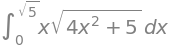

In [10]:
#Masa:
#es la integral del modulo de la derivada del vector, multiplicado por la densidad
#Hallamos primero los extremos:
supx = max(A[0],B[0])
infx = min(A[0],B[0])
aux = derivar(vectorinterseccion,x)
Integral(modulo(aux)*x,(x,infx,supx))

Pregunta 3:<br>
Dado el campo de fuerza F(x;y)=<xy;y^2> y la curva: C:y^2-x=1 que va desde A(-1,0) hasta B(8,3)

In [11]:
#Valores iniciales:
curva = y**2-x-1
campo = [x*y,y**2]
puntoA = [-1,0]
puntoB = [8,3]

In [12]:
#Parametrizar la curva C, usando y=t:
rt = [solve(curva, x)[0].subs(y,t) , t]
rt 
#Vector rt =

In [17]:
solve(curva, x)[0]

In [13]:
frt= [campo[0].subs(x,rt[0]).subs(y,rt[1]),campo[1].subs(y,rt[1])]
frt
#vector f(r(t))=

In [14]:
dr = derivar(rt,t)
dr
#r'(t)=

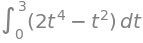

In [15]:
#Planteamos la integral que permite calcular el trabajo realizar por el campo de fuerza F a lo largo de la curva C desde A hasta B
#Como y=t, los limites de y son:
limsuperior = max(puntoA[1],puntoB[1])
liminferior = min(puntoA[1],puntoB[1])
Integral(simplify(productopunto(frt,dr)), (t,liminferior,limsuperior))
